## Multi Objective Optimization example

This example demonstrates how to optimize the production of L-tyrosine in yeast by modifying reactions bounds.


- The medium has limited glucose (10 mmol/gDW/h) and ozygen (12.5 mmol/gDW/h).

- Two objective functions are used to search the modification space: 
      - the biomass-product coupled yield (BPCY), with flux values obtained 
        from lMOMA phenotype predictions, 
      - and the weighed yield (WYIELD).
- Solutions are limited to a maximum of 10 modifications.

The first step constists of importing the required modules and setting the optimization problem.

In [1]:
from mewpy.simulation import SimulationMethod, get_simulator
from mewpy.problems import RKOProblem, ROUProblem
from mewpy.optimization.evaluation import BPCY,WYIELD
from mewpy.optimization import EA
from collections import OrderedDict
from reframed.io.sbml import load_cbmodel

%matplotlib notebook

model = load_cbmodel('models/yeast/iMM904SL_v6.xml', flavor='cobra')

# Some constants to ease the configuration
BIOMASS_ID = 'R_biomass_SC5_notrace'
PRODUCT_ID = 'R_EX_tyr_L_e_'
O2 = 'R_EX_o2_e_'
GLC = 'R_EX_glc_e_'

# Medium definition
envcond = {GLC: (-10.0,999999.0), O2: (-12.25,100000.0)}

# Set the model objective
model.set_objective({BIOMASS_ID:1})

# The evaluation (objective) functions
evaluator_1 = WYIELD(BIOMASS_ID, PRODUCT_ID)
evaluator_2 = BPCY(BIOMASS_ID, PRODUCT_ID, uptake = GLC, method='lMOMA')

# The reaction up and down regulation optimization problem
problem = ROUProblem( model, 
                      fevaluation=[evaluator_1,evaluator_2], 
                      envcond = envcond,  
                      candidate_max_size = 10)

In the second step, we create an instance of the EA optimizer for the problem.
The stopping criteria is set to 10 generations (1100 evaluations).
However, the stopping criteria should contemplate more evaluations for real purpose optimization.

Building modification target list.
Running NSGAII


<IPython.core.display.Javascript object>


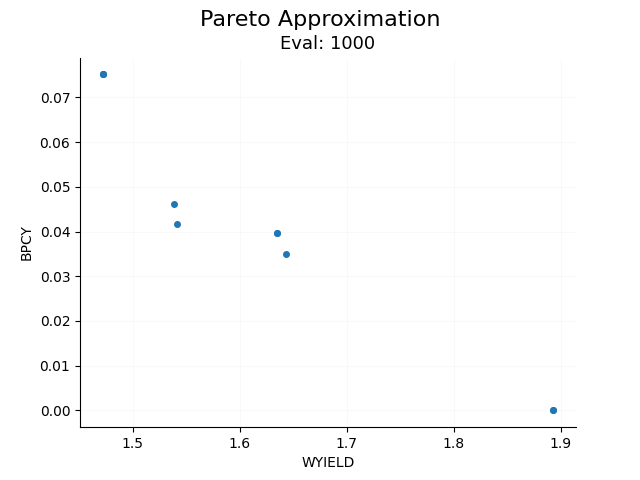

In [2]:
ea = EA(problem, max_generations = 10,visualizer = True,mp=True)
# runs the optimization
final_pop = ea.run()

Other tasks may be performed, such as view the proposed solutions and fitness values:

In [5]:
ea.dataframe()

,Modification,Size,WYIELD,BPCY
0,"{'R_GLNS': 32, 'R_PPND2': 32}",2,1.635085,0.039601
1,"{'R_GLNS': 32, 'R_PPND2': 32}",2,1.635085,0.039601
2,"{'R_PPND2': 32, 'R_HSK': 2}",2,1.538095,0.046256
3,"{'R_ADK1': 0.125, 'R_HSK': 4, 'R_PPND2': 32}",3,1.471727,0.075139
4,"{'R_GLNS': 32, 'R_PPND2': 32, 'R_IMPD': 2}",3,1.643223,0.035036
5,"{'R_IMPC': 32, 'R_PPND2': 32, 'R_HSK': 4}",3,1.893220,0.000000
6,"{'R_ADK1': 0.125, 'R_HSK': 4, 'R_PPND2': 32}",3,1.471727,0.075139
7,"{'R_PPND2': 32, 'R_G5SADr': 16}",2,1.541749,0.041761
8,"{'R_IMPC': 32, 'R_PPND2': 32, 'R_HSK': 4}",3,1.893220,0.000000
9,"{'R_PPND2': 32, 'R_HSK': 4}",2,1.471727,0.044926


It is also possible to plot the production envelope for L-tyrosine when the modifications are applied.

<IPython.core.display.Javascript object>


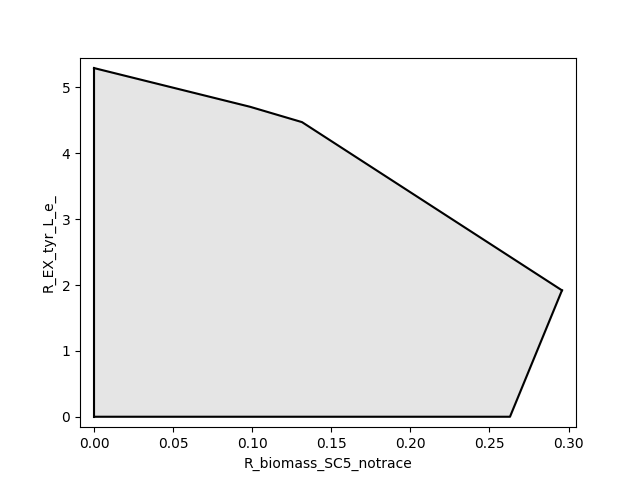

<AxesSubplot:xlabel='R_biomass_SC5_notrace', ylabel='R_EX_tyr_L_e_'>

In [7]:
from mewpy.visualization.envelope import plot_flux_envelope

# solution ID 1
solution = final_pop[1].values
constraints = final_pop[1].get_constraints()
plot_flux_envelope(model,BIOMASS_ID,PRODUCT_ID,constraints=constraints)

In [9]:
problem.simulate(solution=solution,method='pFBA').find([BIOMASS_ID,PRODUCT_ID,GLC])

,Flux rate
Reaction ID,
R_EX_tyr_L_e_,1.919512
R_biomass_SC5_notrace,0.295522
R_EX_glc_e_,-10.000000
R_EX_tyr_L_e__d+,1.919512
R_EX_tyr_L_e__d-,0.000000
R_biomass_SC5_notrace_d+,0.000000
R_biomass_SC5_notrace_d-,0.301799
R_EX_glc_e__d+,0.000000
R_EX_glc_e__d-,0.000000
